# Automobile Data Analysis

An automobile parts manufacturing company has collected data of transactions for 3 years. Our job is to use data
science skills to provide them with suitable insights about their data and their customers.

In [1]:
#basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("Sales_Data.xlsx",sheet_name='Sheet1') #importing the dataset

In [3]:
descr = pd.read_excel("Sales_Data.xlsx",sheet_name='Sheet2',) #importing the variable description

In [4]:
descr

,Feature Name,Description
0,ORDERNUMBER,Order Number
1,QUANTITYORDERED,Quantity ordered
2,PRICEEACH,Price of Each item
3,ORDERLINENUMBER,order line
4,SALES,Sales amount
5,ORDERDATE,Order Date
6,DAYS_SINCE_LASTORDER,Days_ Since_Lastorder
7,STATUS,Status of order like Shipped or not
8,PRODUCTLINE,Product line – CATEGORY
9,MSRP,Manufacturer's Suggested Retail Price


In [5]:
df.head() #glance of dataset

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [6]:
df.shape

(2747, 20)

In [7]:
df.info() #information about the variables present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [8]:
df.isnull().sum() #checking for the nulls

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [9]:
df['CONTACTFULLNAME'] = df['CONTACTFIRSTNAME']+' '+ df['CONTACTLASTNAME'] # Creating new column for contact name

In [10]:
df.drop(labels=['CONTACTFIRSTNAME','CONTACTLASTNAME'],axis=1,inplace=True) # Dropping the unnecessary columns

In [11]:
df.duplicated().sum() #checking for the duplicated rows

0

In [12]:
last_order_date = df.groupby('CUSTOMERNAME').max()['ORDERDATE'].max()
last_order_date

Timestamp('2020-05-31 00:00:00')

### NOTE:
For data exploration, tableau public edition was used.
For more information please refer to this link:
https://public.tableau.com/app/profile/dev.tripathi/viz/MARKET_n_RETAIL_PROJECT/Order_Sales_Status

# RFM CALCULATION

## Recency:

In [13]:
# Here we have taken an  assumption that this analysis is being performed on '1st June 2020'
df['DAYS_SINCE_LASTORDER'] = pd.to_datetime('2020-06-01')-df['ORDERDATE']

In [14]:
df_r =  pd.DataFrame(df.groupby('CUSTOMERNAME').min()['DAYS_SINCE_LASTORDER'])

In [15]:
df_r['DAYS_SINCE_LASTORDER'] = df_r['DAYS_SINCE_LASTORDER'].apply(lambda x: int(x.days))

In [16]:
df_r['Max_Order_Date'] = df.groupby('CUSTOMERNAME').max()['ORDERDATE']

In [17]:
df_r['Recency'] = pd.qcut(df_r['DAYS_SINCE_LASTORDER'],q=[0,.333,.666,1],labels=['High','Medium','Low'])

In [18]:
df_r.head()

,DAYS_SINCE_LASTORDER,Max_Order_Date,Recency
CUSTOMERNAME,,,
"AV Stores, Co.",197,2019-11-17,Medium
Alpha Cognac,65,2020-03-28,High
Amica Models & Co.,266,2019-09-09,Low
"Anna's Decorations, Ltd",84,2020-03-09,High
Atelier graphique,189,2019-11-25,Medium


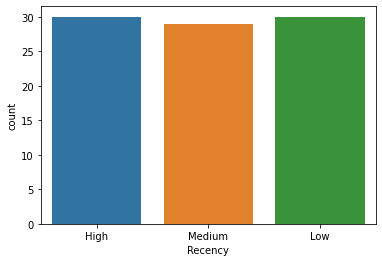

In [19]:
sns.countplot(x='Recency',data=df_r);

## Frequency

In [20]:
df_f = pd.DataFrame(df.groupby('CUSTOMERNAME').count()['ORDERNUMBER']) # number of orders placed by a single customer

In [21]:
df_f = pd.DataFrame(df_f['ORDERNUMBER'].rename('Num_Transactions',inplace=True)) 

In [22]:
oldest_order_date = df.groupby('CUSTOMERNAME').min()['ORDERDATE']
df_f['Oldest_order_date'] = oldest_order_date
df_f['Num_Months_01_06_20'] = (pd.to_datetime('2020-06-01')-oldest_order_date).apply(lambda x: x/ np.timedelta64(1, "M")).values

In [23]:
df_f['Transc_per_month'] = (df_f['Num_Transactions']/df_f['Num_Months_01_06_20']).apply(int) 

In [24]:
df_f['Frequency']=pd.cut(df_f['Transc_per_month'],
                         bins =[-.5,0.5,1.5,5.5,10],
                         labels=['Low', 'Medium', 'High', 'VeryHigh'])

In [25]:
df_f.head()

,Num_Transactions,Oldest_order_date,Num_Months_01_06_20,Transc_per_month,Frequency
CUSTOMERNAME,,,,,
"AV Stores, Co.",51,2018-03-18,26.481037,1,Medium
Alpha Cognac,20,2018-07-04,22.932709,0,Low
Amica Models & Co.,26,2019-08-17,9.495062,2,High
"Anna's Decorations, Ltd",46,2018-09-11,20.665722,2,High
Atelier graphique,7,2018-05-20,24.411179,0,Low


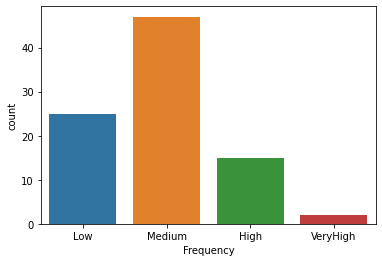

In [26]:
sns.countplot(x='Frequency',data=df_f);

## Monetary

In [27]:
df_m = pd.DataFrame(df.groupby('CUSTOMERNAME').sum()['SALES'])

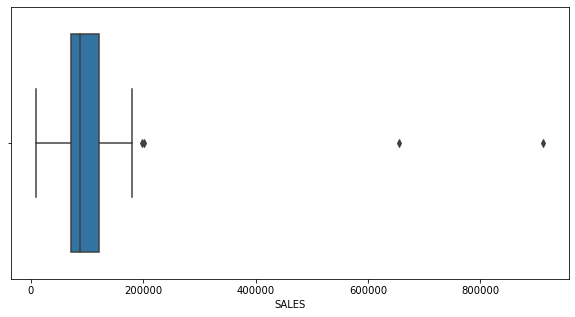

In [28]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df_m,x='SALES');

In [29]:
df_m[df_m['SALES']>200000] #Customers having sales>200000

,SALES
CUSTOMERNAME,
"Australian Collectors, Co.",200995.41
Euro Shopping Channel,912294.11
Mini Gifts Distributors Ltd.,654858.06


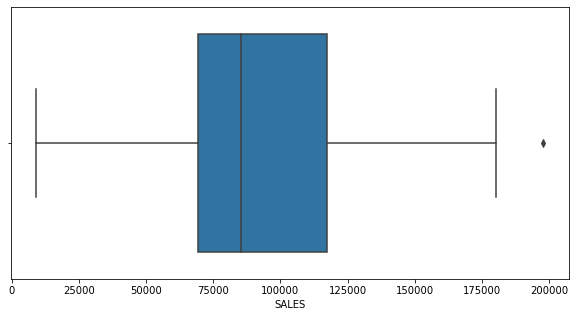

In [30]:
a = df_m.drop(df_m[df_m['SALES']>200000].index) # After dropping the apparent outliers
plt.figure(figsize=[10,5])
sns.boxplot(x='SALES',data=a);

In [31]:
df_m['Monetary']=pd.qcut(df_m['SALES'],[0,0.3333,0.6666,1],labels=['Low','Medium','High'])

In [32]:
df_m.head()

,SALES,Monetary
CUSTOMERNAME,,
"AV Stores, Co.",157807.81,High
Alpha Cognac,70488.44,Low
Amica Models & Co.,94117.26,Medium
"Anna's Decorations, Ltd",153996.13,High
Atelier graphique,24179.96,Low


## Merging R,F,M tables

In [33]:
merged= pd.merge(df_r.reset_index(),df_f.reset_index(),on='CUSTOMERNAME')
df_rfm = pd.merge(merged,df_m.reset_index(),on='CUSTOMERNAME')

In [34]:
df_rfm.head()

,CUSTOMERNAME,DAYS_SINCE_LASTORDER,Max_Order_Date,Recency,Num_Transactions,Oldest_order_date,Num_Months_01_06_20,Transc_per_month,Frequency,SALES,Monetary
0,"AV Stores, Co.",197,2019-11-17,Medium,51,2018-03-18,26.481037,1,Medium,157807.81,High
1,Alpha Cognac,65,2020-03-28,High,20,2018-07-04,22.932709,0,Low,70488.44,Low
2,Amica Models & Co.,266,2019-09-09,Low,26,2019-08-17,9.495062,2,High,94117.26,Medium
3,"Anna's Decorations, Ltd",84,2020-03-09,High,46,2018-09-11,20.665722,2,High,153996.13,High
4,Atelier graphique,189,2019-11-25,Medium,7,2018-05-20,24.411179,0,Low,24179.96,Low


In [35]:
df_rfm['rfm'] = df_rfm[['Recency','Frequency','Monetary']].apply(lambda x: '_'.join(x.values),axis=1)

In [36]:
df_rfm

,CUSTOMERNAME,DAYS_SINCE_LASTORDER,Max_Order_Date,Recency,Num_Transactions,Oldest_order_date,Num_Months_01_06_20,Transc_per_month,Frequency,SALES,Monetary,rfm
0,"AV Stores, Co.",197,2019-11-17,Medium,51,2018-03-18,26.481037,1,Medium,157807.81,High,Medium_Medium_High
1,Alpha Cognac,65,2020-03-28,High,20,2018-07-04,22.932709,0,Low,70488.44,Low,High_Low_Low
2,Amica Models & Co.,266,2019-09-09,Low,26,2019-08-17,9.495062,2,High,94117.26,Medium,Low_High_Medium
3,"Anna's Decorations, Ltd",84,2020-03-09,High,46,2018-09-11,20.665722,2,High,153996.13,High,High_High_High
4,Atelier graphique,189,2019-11-25,Medium,7,2018-05-20,24.411179,0,Low,24179.96,Low,Medium_Low_Low
...,...,...,...,...,...,...,...,...,...,...,...,...
84,"Vida Sport, Ltd",276,2019-08-30,Low,31,2019-02-22,15.277521,2,High,117713.56,High,Low_High_High
85,Vitachrome Inc.,209,2019-11-05,Medium,25,2018-01-10,28.682314,0,Low,88041.26,Medium,Medium_Low_Medium
86,"Volvo Model Replicas, Co",195,2019-11-19,Medium,19,2018-03-24,26.283907,0,Low,75754.88,Low,Medium_Low_Low
87,West Coast Collectables Co.,489,2019-01-29,Low,13,2018-12-01,18.004476,0,Low,46084.64,Low,Low_Low_Low


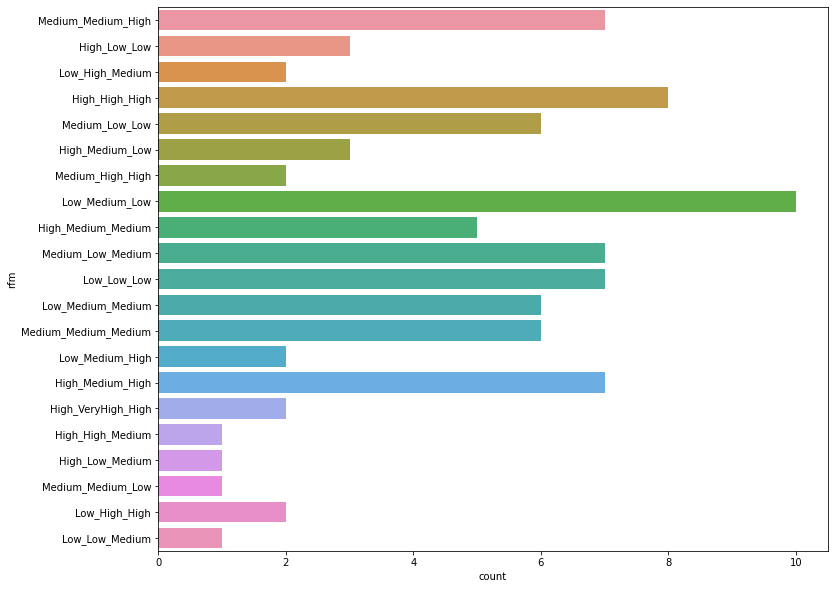

In [37]:
plt.figure(figsize=[12,10])
sns.countplot(y='rfm',data=df_rfm,orient='h');

In [38]:
### RUN THIS CELL TO EXPORT DATA TO EXCEL #####

# #with pd.ExcelWriter('RFM_SALES.xlsx') as writer:
#     df_rfm.to_excel(writer, sheet_name='python_RFM')
#     df_rfm[['CUSTOMERNAME','Recency','Frequency','Monetary','rfm']].to_excel(writer, sheet_name='RFM')

In [39]:
df_rfm[['CUSTOMERNAME','Recency','Frequency','Monetary','rfm']].head()

,CUSTOMERNAME,Recency,Frequency,Monetary,rfm
0,"AV Stores, Co.",Medium,Medium,High,Medium_Medium_High
1,Alpha Cognac,High,Low,Low,High_Low_Low
2,Amica Models & Co.,Low,High,Medium,Low_High_Medium
3,"Anna's Decorations, Ltd",High,High,High,High_High_High
4,Atelier graphique,Medium,Low,Low,Medium_Low_Low


### NOTE: 

For segmentation excel was used. For more information please refer to excel file (named as RFM_Sales.xlsx) attached with this notebook file.

# Thank you!